In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from glob import glob
import joypy
from PIL import Image
from io import BytesIO
import numpy as np

gender_colormap = {"female": "hotpink", "male": "skyblue", "baseline": "green"}


def load_and_add_model(path):
    data = pd.read_csv(path)
    data["model"] = path.split("/")[-1].split(".")[0]
    return data


df = pd.concat(
    [load_and_add_model(path) for path in glob("../data/processed/*.csv") if "baseline" not in path]
)

In [2]:
baseline = pd.concat(
    [load_and_add_model(path) for path in glob("../data/processed/*.csv") if "baseline" in path]
)

lexical diversity
WilcoxonResult(statistic=np.float64(1919319.5), pvalue=np.float64(1.6788613575525763e-11))
reading difficulty
WilcoxonResult(statistic=np.float64(1840823.0), pvalue=np.float64(3.208331465666865e-14))
analytical
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))
self references
WilcoxonResult(statistic=np.float64(2054682.5), pvalue=np.float64(0.00014113986578051405))
certainty
WilcoxonResult(statistic=np.float64(793673.5), pvalue=np.float64(3.567227494123318e-05))
emotionality
WilcoxonResult(statistic=np.float64(2134788.5), pvalue=np.float64(0.27712286065653347))


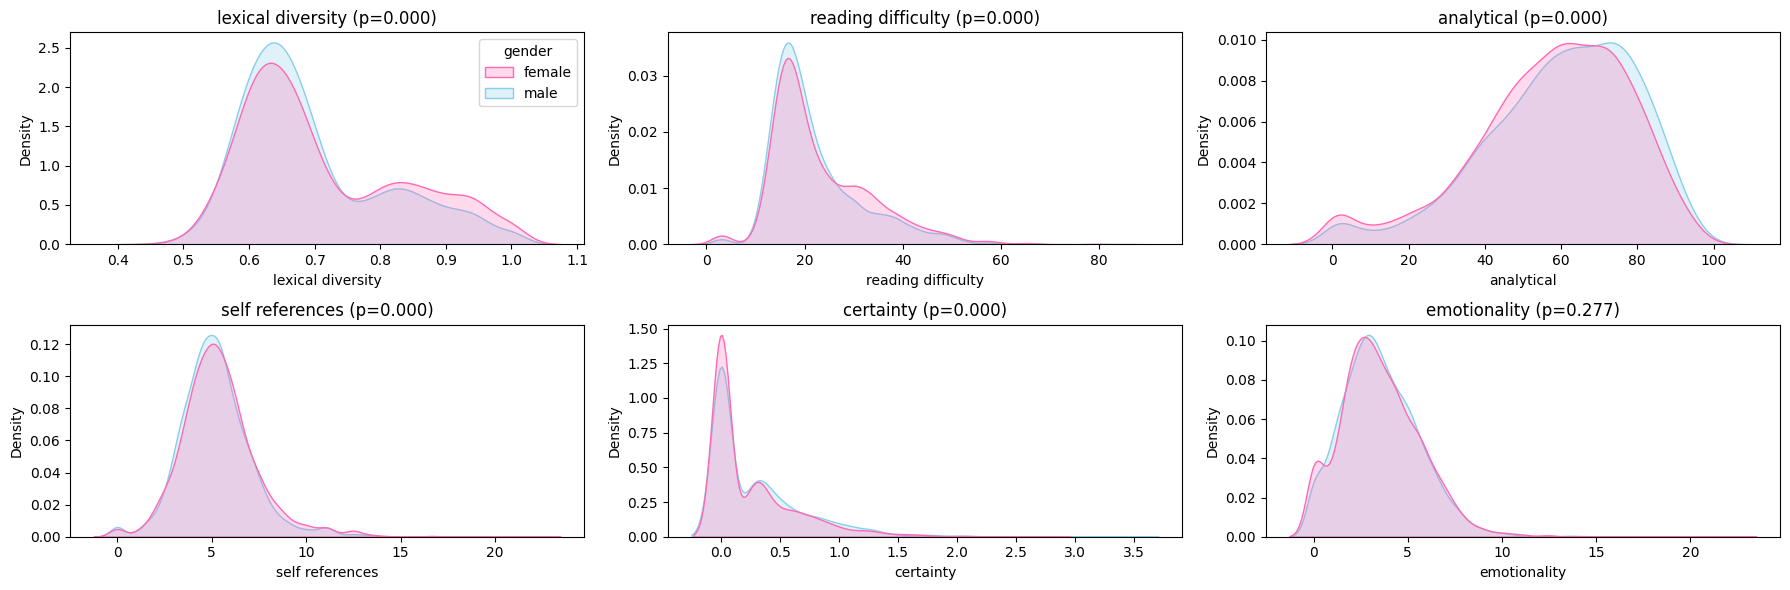

In [9]:
emotional = df[df["type"] == "emotional"].reset_index(drop=True)
# baseline["gender"] = "baseline"
# emotional = pd.concat([emotional, baseline], ignore_index=True)

fig, ax = plt.subplots(2, 3, figsize=(18, 6))


for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    print(measure)
    wilcoxon_result = wilcoxon(
        emotional[emotional["gender"] == "male"][measure],
        emotional[emotional["gender"] == "female"][measure],
    )
    print(wilcoxon_result)
    sns.kdeplot(
        emotional, x=measure, hue="gender", fill=True, palette=gender_colormap, ax=ax[i // 3, i % 3]
    )
    p = wilcoxon_result.pvalue if not np.isnan(wilcoxon_result.pvalue) else 0
    ax[i // 3, i % 3].set_title(f"{measure} (p={p:.3f})")
    if i != 0:
        ax[i // 3, i % 3].legend_.remove()
fig.tight_layout()
plt.show()

lexical diversity
reading difficulty
analytical
self references
certainty
emotionality


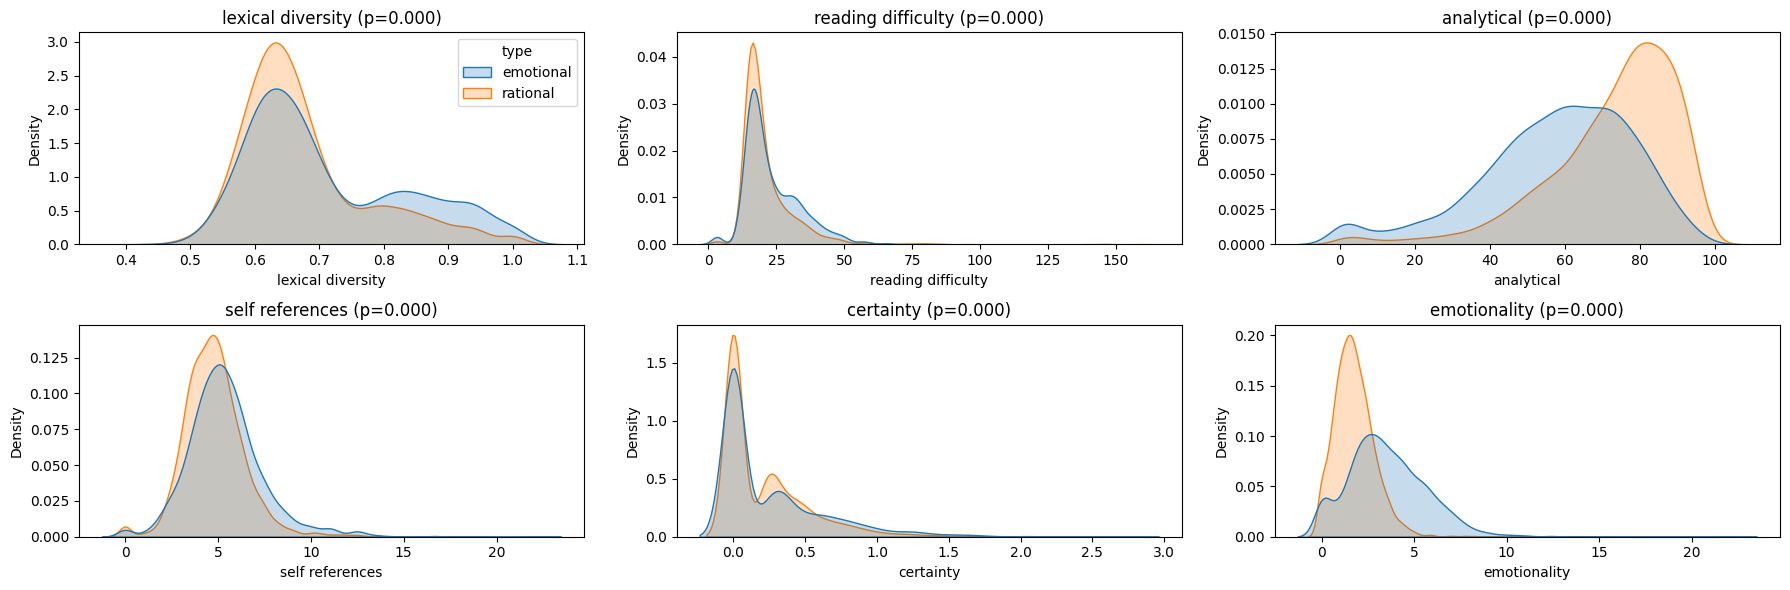

In [10]:
female = df[df["gender"] == "female"].reset_index(drop=True)
# baseline["type"] = "baseline"
# female = pd.concat([female, baseline], ignore_index=True)

fig, ax = plt.subplots(2, 3, figsize=(18, 6))
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    print(measure)
    wilcoxon_result = wilcoxon(
        female[female["type"] == "rational"][measure],
        female[female["type"] == "emotional"][measure],
    )
    sns.kdeplot(female, x=measure, hue="type", ax=ax[i // 3, i % 3], fill=True)
    p = wilcoxon_result.pvalue if not np.isnan(wilcoxon_result.pvalue) else 0
    ax[i // 3, i % 3].set_title(f"{measure} (p={p:.3f})")
    if i != 0:
        ax[i // 3, i % 3].legend_.remove()
fig.tight_layout()
plt.show()

lexical diversity
reading difficulty
analytical
self references
certainty
emotionality


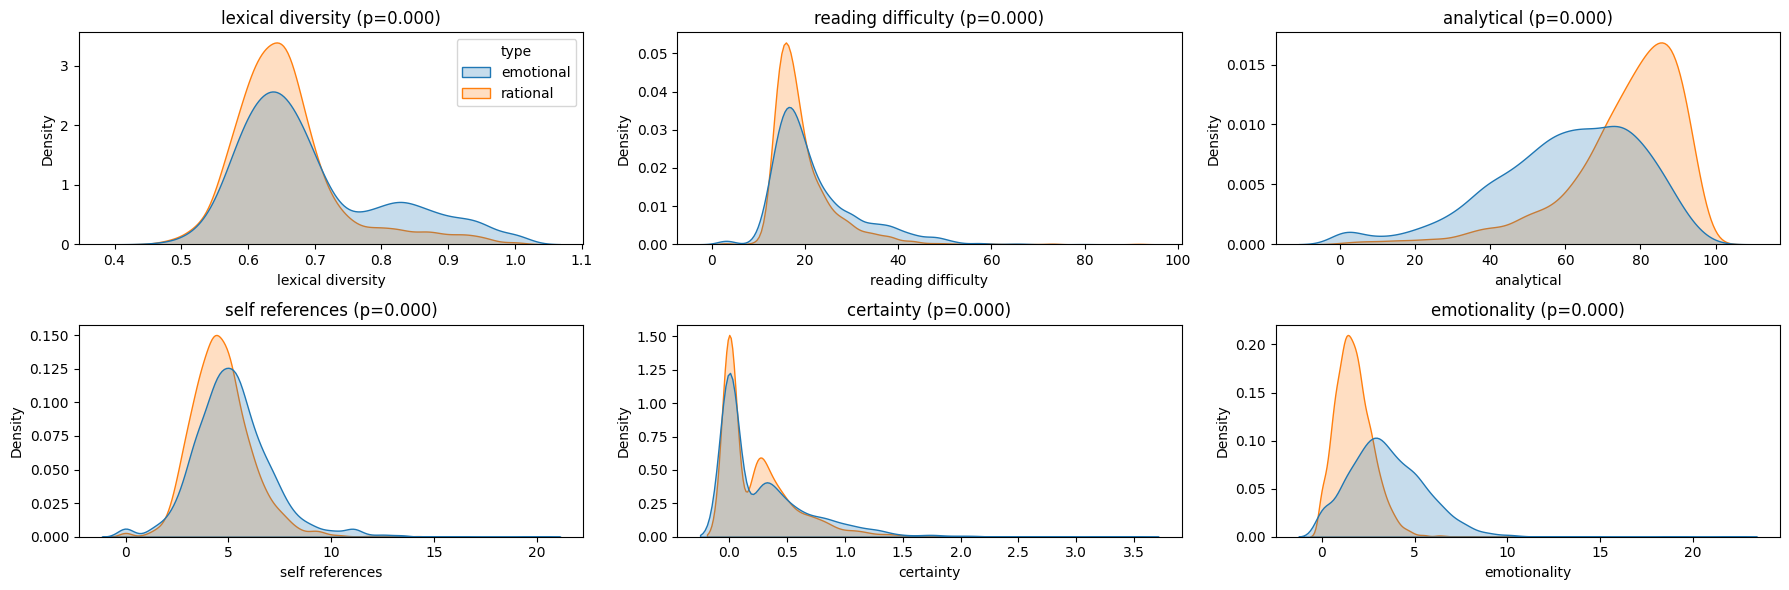

In [13]:
female = df[df["gender"] == "male"].reset_index(drop=True)
# baseline["type"] = "baseline"
# female = pd.concat([female, baseline], ignore_index=True)

fig, ax = plt.subplots(2, 3, figsize=(18, 6))
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    print(measure)
    wilcoxon_result = wilcoxon(
        female[female["type"] == "rational"][measure],
        female[female["type"] == "emotional"][measure],
    )
    sns.kdeplot(female, x=measure, hue="type", ax=ax[i // 3, i % 3], fill=True)
    p = wilcoxon_result.pvalue if not np.isnan(wilcoxon_result.pvalue) else 0
    ax[i // 3, i % 3].set_title(f"{measure} (p={p:.3f})")
    if i != 0:
        ax[i // 3, i % 3].legend_.remove()
fig.tight_layout()
plt.show()

# wnioski:
- baseline różni się pod wieloma względami od poszczególnych typów zapytań
- odpowiedź baselineowa modelu do kobiet i mężczyzn jest bardziej podobna do racjonalnej niż emocjonalnej
- llm próbując emocjonalnie przekonać kobiety używa trudniejszych słów niż w stosunku do mężczyzn


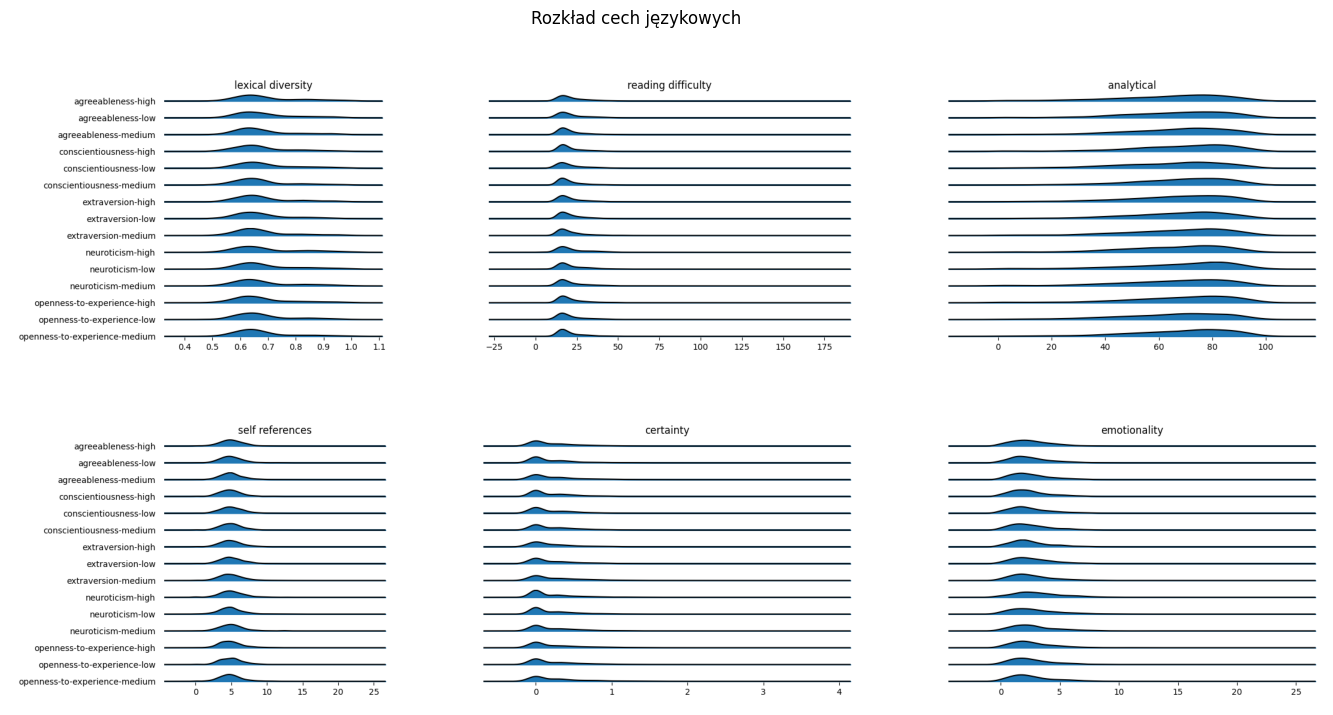

In [ ]:
df["temp"] = df["trait"].str.replace(" ", "-") + "-" + df["level"]

images = []
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    fig, axes = joypy.joyplot(df, by="temp", column=measure)
    if i % 3 != 0:
        for a in axes:
            a.set_yticklabels([])
            a.set_yticks([])
    plt.title(measure)
    buf = BytesIO()
    plt.tight_layout(pad=1.0)
    plt.savefig(buf, format="png")
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)
    plt.close()

fig, ax = plt.subplots(2, 3, figsize=(24, 8))
plt.suptitle("Rozkład cech językowych")
for a, img in zip(ax.flatten(), images):
    a.imshow(img)
    a.axis("off")
plt.subplots_adjust(wspace=-0.5, top=0.5)
plt.show()

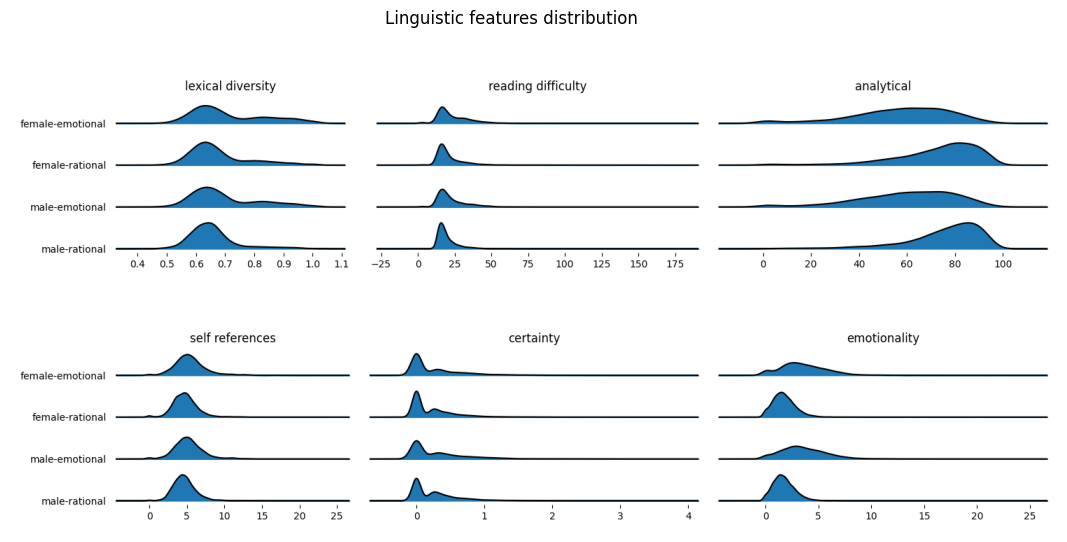

In [ ]:
df["temp"] = df["gender"] + "-" + df["type"]
images = []
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    fig, axes = joypy.joyplot(df, by="temp", column=measure, figsize=(5, 3))
    if i % 3 != 0:
        for a in axes:
            a.set_yticklabels([])
            a.set_yticks([])
    plt.title(measure)
    buf = BytesIO()
    plt.tight_layout()
    plt.savefig(buf, format="png")
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)
    plt.close()
fig, ax = plt.subplots(2, 3, figsize=(18, 6))
plt.suptitle("Linguistic features distribution")
for a, img in zip(ax.flatten(), images):
    a.imshow(img)
    a.axis("off")
plt.subplots_adjust(wspace=-0.5)
plt.show()